In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [11]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Movies_gross_rating.csv')
df.head()


Saving Movies_gross_rating.csv to Movies_gross_rating (3).csv


,index,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,release date_DD,release month_MM
0,0,1,Look Who's Talking,PG-13,7500000,296000000,12-10-1989,Romance,93,5.9,73638.0,12,10
1,1,2,Driving Miss Daisy,PG,7500000,145793296,13-12-1989,Comedy,99,7.4,91075.0,13,12
2,2,3,Turner & Hooch,PG,13000000,71079915,28-07-1989,Crime,100,7.2,91415.0,28,7
3,3,4,Born on the Fourth of July,R,14000000,161001698,20-12-1989,War,145,7.2,91415.0,20,12
4,4,5,Field of Dreams,PG,15000000,84431625,21-04-1989,Drama,107,7.5,101702.0,21,4


In [12]:
# Select numeric features and target
features = ['Budget', 'Runtime', 'Rating', 'Rating Count', 'release date_DD', 'release month_MM']
target = 'Gross'

# Drop missing values
df = df[features + [target]].dropna()

# Convert to NumPy arrays
X = df[features].values
y = df[target].values


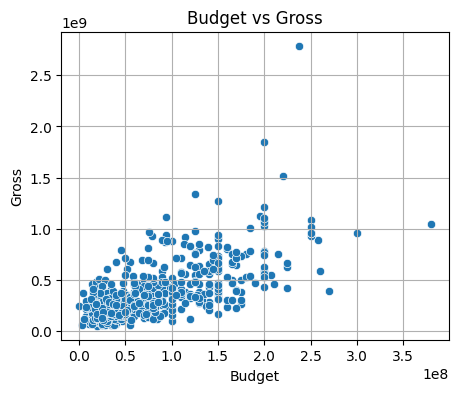

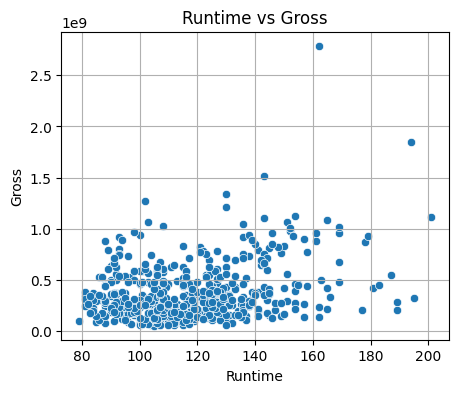

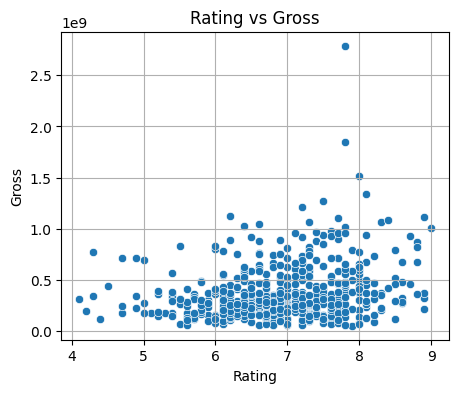

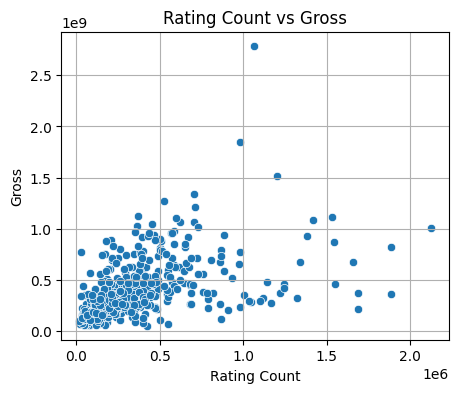

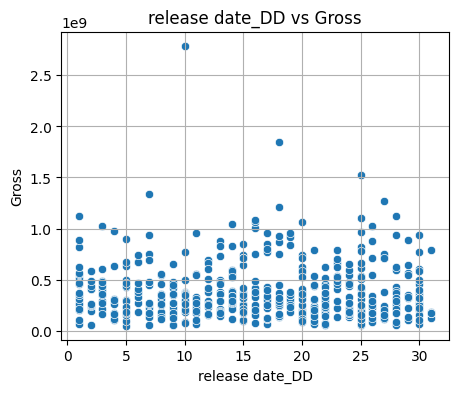

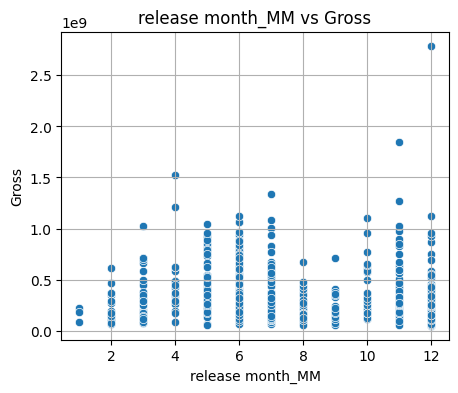

In [13]:
# Plot feature vs target
for i, col in enumerate(features):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f'{col} vs {target}')
    plt.grid(True)
    plt.show()

In [14]:
# Normalize features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Normalize target
y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std

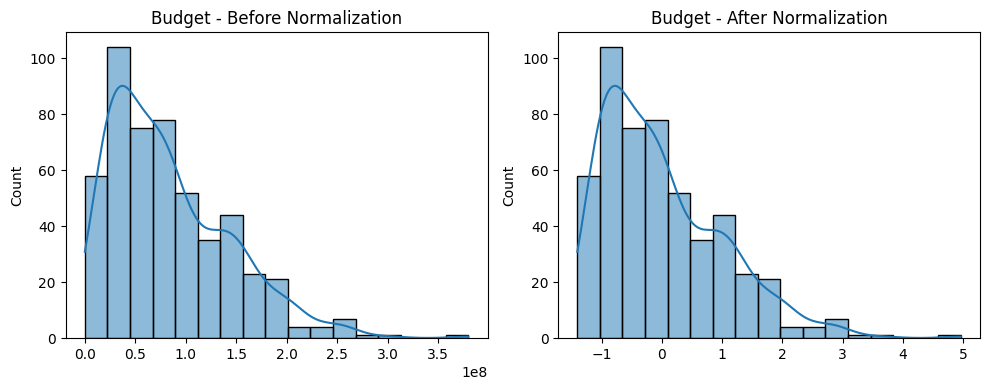

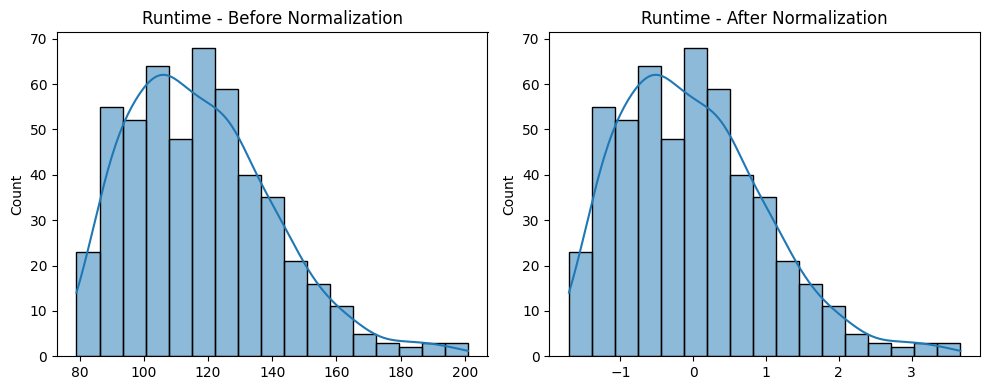

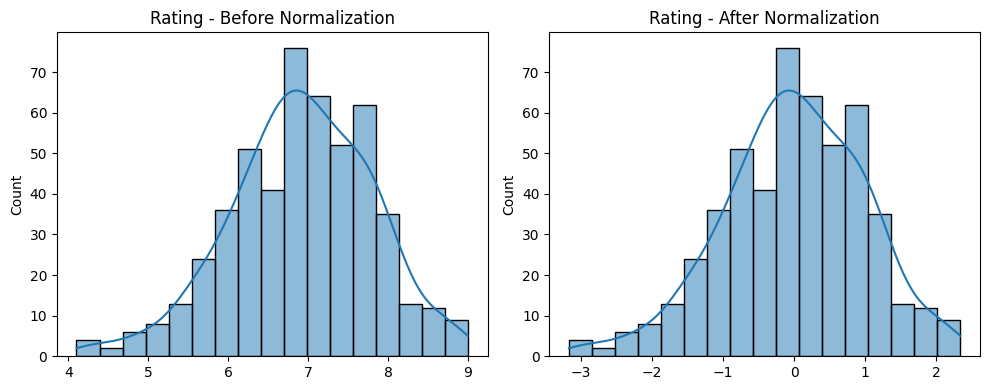

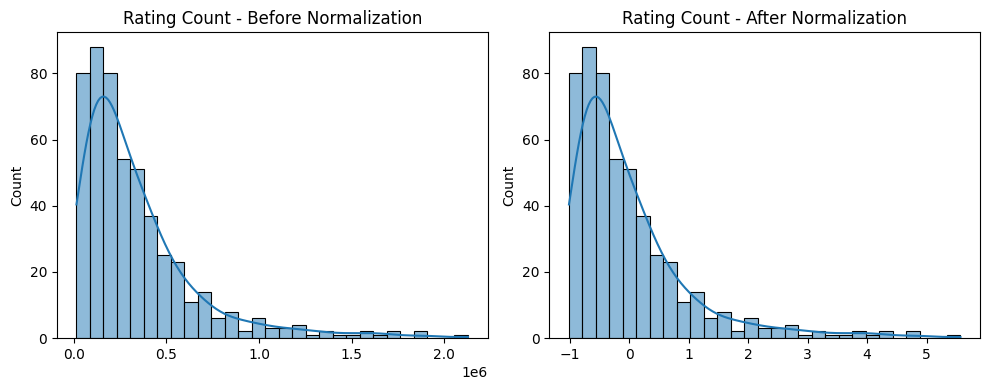

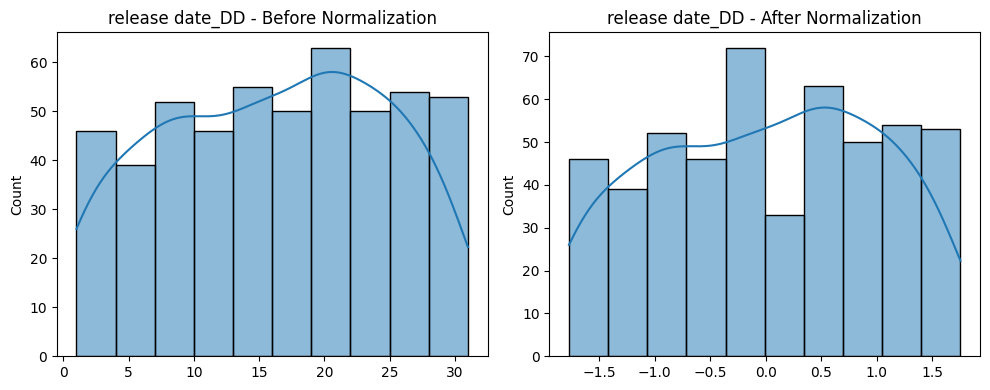

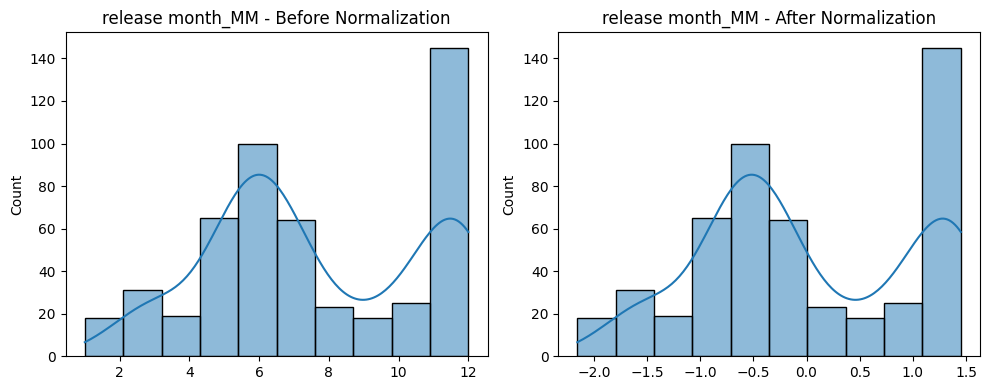

In [15]:
# Plot before vs after normalization
for i in range(X.shape[1]):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(X[:, i], ax=axs[0], kde=True)
    axs[0].set_title(f'{features[i]} - Before Normalization')

    sns.histplot(X_norm[:, i], ax=axs[1], kde=True)
    axs[1].set_title(f'{features[i]} - After Normalization')
    plt.tight_layout()
    plt.show()

In [40]:
# Gradient Descent with Learning Rate Sweep
n_samples, n_features = X_norm.shape
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.1]
epochs = 200
loss_curves = {}

for lr in learning_rates:
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    losses = []

    for epoch in range(epochs):
        y_pred = X_norm.dot(w) + b
        error = y_pred - y_norm

        loss = np.mean(error ** 2)
        losses.append(loss)

        dw = (2 / n_samples) * X_norm.T.dot(error)
        db = (2 / n_samples) * np.sum(error)

        w -= lr * dw
        b -= lr * db

    loss_curves[lr] = losses

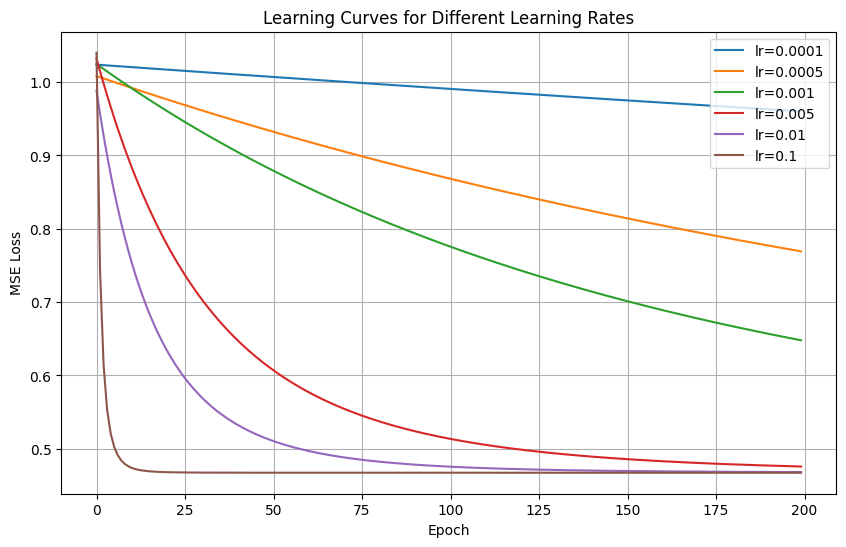

In [41]:
# Plot all learning curves
plt.figure(figsize=(10, 6))
for lr, losses in loss_curves.items():
    plt.plot(losses, label=f'lr={lr}')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Learning Curves for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Step 9: Final Training with Best Learning Rate (e.g., 0.1)
best_lr = 0.1
w = np.random.randn(n_features) * 0.01
b = 0.0
loss_history = []

for epoch in range(500):
    y_pred = X_norm.dot(w) + b
    error = y_pred - y_norm
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    dw = (2 / n_samples) * X_norm.T.dot(error)
    db = (2 / n_samples) * np.sum(error)

    w -= best_lr * dw
    b -= best_lr * db

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 1.0180
Epoch 50: Loss = 0.4672
Epoch 100: Loss = 0.4672
Epoch 150: Loss = 0.4672
Epoch 200: Loss = 0.4672
Epoch 250: Loss = 0.4672
Epoch 300: Loss = 0.4672
Epoch 350: Loss = 0.4672
Epoch 400: Loss = 0.4672
Epoch 450: Loss = 0.4672


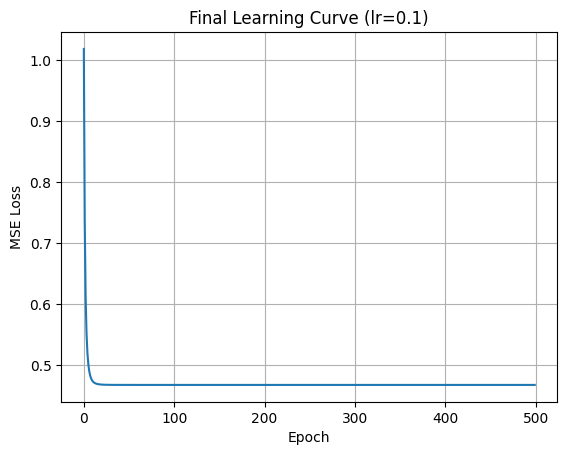

R² Score: 0.5328


In [43]:
# Step 10: Plot Final Learning Curve
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title(f"Final Learning Curve (lr={best_lr})")
plt.grid(True)
plt.show()

# Step 11: Evaluation
y_pred = X_norm.dot(w) + b
r2 = 1 - np.sum((y_norm - y_pred) ** 2) / np.sum((y_norm - y_norm.mean()) ** 2)
print(f"R² Score: {r2:.4f}")

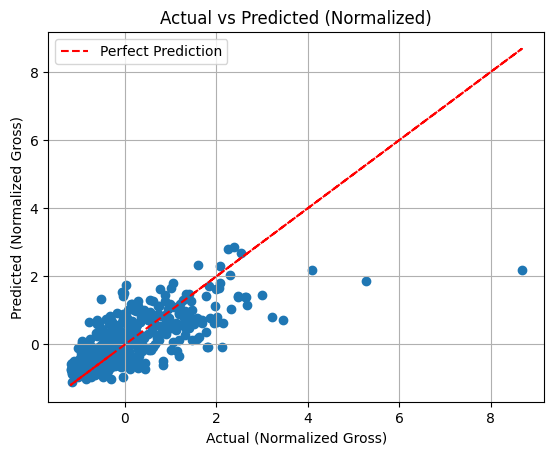

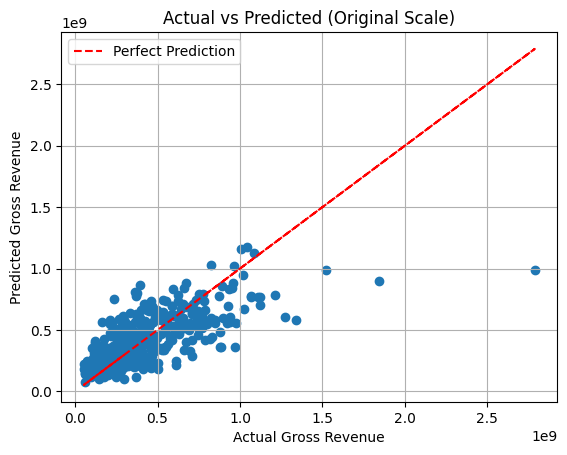

In [47]:
# Reverse normalization to original scale
y_pred_original = y_pred * y_std + y_mean

# Plot Actual vs Predicted (normalized)
plt.scatter(y_norm, y_pred)
plt.plot(y_norm, y_norm, 'r--', label='Perfect Prediction')
plt.xlabel("Actual (Normalized Gross)")
plt.ylabel("Predicted (Normalized Gross)")
plt.title("Actual vs Predicted (Normalized)")
plt.legend()
plt.grid(True)
plt.show()


# Plot Actual vs Predicted (original scale)
plt.scatter(y, y_pred_original)
plt.plot(y, y, 'r--', label='Perfect Prediction')
plt.xlabel("Actual Gross Revenue")
plt.ylabel("Predicted Gross Revenue")
plt.title("Actual vs Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def predict_gross(user_input_features):
    """
    Predict gross revenue for a single input feature vector.

    user_input_features: list or array-like of length equal to number of features
                         Order must be the same as `features` list:
                         ['Budget', 'Runtime', 'Rating', 'Rating Count', 'release date_DD', 'release month_MM']
    """
    x = np.array(user_input_features, dtype=float)
    x_norm = (x - X_mean) / X_std
    y_pred_norm = np.dot(x_norm, w) + b
    y_pred_original = y_pred_norm * y_std + y_mean
    return y_pred_original

# Example: Interactive user input (works in Colab)
print("\nEnter movie feature values to predict Gross Revenue:")

user_features = []
for feature_name in features:
    val = float(input(f"{feature_name}: "))
    user_features.append(val)

predicted_gross = predict_gross(user_features)
print(f"\nPredicted Gross Revenue: ${predicted_gross:,.2f}")